## **Linear Regression with Python Scikit Learn**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Ninad Satam

First we will import all the required libraries.
1. pandas
2. numpy
3. matplotlib
4. sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Now we get the dataset from the url provided i.e. http://bit.ly/w-data
Here the data is stored in the form of csv file.

In [2]:
url = 'http://bit.ly/w-data'
given_data = pd.read_csv(url)
print('Data is imported. First 15 entries are as follows.\n')
given_data.head(15)

Data is imported. First 15 entries are as follows.



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we plot the data entries on a two dimmensional graph to just check whether we can manually find any relationship between the Hours and Scores.

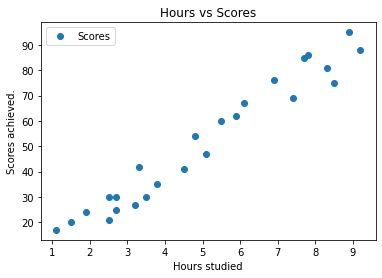

In [3]:
given_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores achieved.')
plt.show()

By seeing the graph now we have a rough idea that there is some positive relation between number of hours and the scores.

Now we will prepare the data as in we will split it into 'attributes' and 'labels'

In [4]:
att = given_data.iloc[:, :-1].values
lab = given_data.iloc[:, 1].values
print('Inputs are \n',att)
print('Outputs are \n',lab)

Inputs are 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Outputs are 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now to learn the model we have to split the available data into training set and test set. To do this we will take the help of Scikit-Learn's built-in function.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(att, lab, test_size = 0.2, random_state = 0)

Finally we have prepared the data and now its time to learn our model with linear regression.

In [6]:
import time

start = time.time()

reg = LinearRegression()
reg.fit(X_train, Y_train)

end = time.time()

print(f'Model is trained in {end-start} seconds')

Model is trained in 0.001001596450805664 seconds


Now we plot the regression line on the test data.

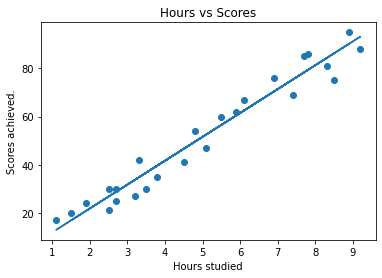

In [7]:
line = reg.coef_*att + reg.intercept_
plt.scatter(att, lab)
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores achieved.')
plt.plot(att, line)
plt.show()

To check whether the model is well trained or not we make some predictions.

In [8]:
print(f'Test data in hours :\n {X_test}')

Test data in hours :
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
Y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Let's predict for some manual value.

In [12]:
hours = [[9.25]]
own_pred = reg.predict(hours)
print(f'Hours: {hours[0][0]} \nPredicted Score: {own_pred[0]}')

Hours: 9.25 
Predicted Score: 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_pred)}') 

Mean Absolute Error: 4.18385989900298
